# Wing modelling example #

In this example, we demonstrate, how to build up a wing surface by starting with a list of curves. These curves are then interpolated using a B-spline suface interpolation

## Importing modules ##

Again, all low lovel geomtry functions can be found in the ```tigl3.geometry``` module. For a more convenient use,
the module __```tigl3.surface_factories```__ offers functions to create surfaces. Lets use this!

In [1]:
import tigl3.curve_factories
import tigl3.surface_factories
from OCC.gp import gp_Pnt
from OCC.Display.SimpleGui import init_display
import numpy as np

## Create profile points ##

Now, we want to create 3 profiles that are the input for the profile curves. The wing should have one curve at its root, one at its outer end and one at the tip of a winglet.

In [2]:
# list of points on NACA2412 profile
px = [1.000084, 0.975825, 0.905287, 0.795069, 0.655665, 0.500588, 0.34468, 0.203313, 0.091996, 0.022051, 0.0, 0.026892, 0.098987, 0.208902, 0.346303, 0.499412, 0.653352, 0.792716, 0.90373, 0.975232, 0.999916]
py = [0.001257, 0.006231, 0.019752, 0.03826, 0.057302, 0.072381, 0.079198, 0.072947, 0.054325, 0.028152, 0.0, -0.023408, -0.037507, -0.042346, -0.039941, -0.033493, -0.0245, -0.015499, -0.008033, -0.003035, -0.001257]

points_c1 = np.array([pnt for pnt in zip(px, [0.]*len(px), py)]) * 2.
points_c2 = np.array([pnt for pnt in zip(px, [0]*len(px), py)])
points_c3 = np.array([pnt for pnt in zip(px, py, [0.]*len(px))]) * 0.2

# shift sections to their correct position
# second curve at y = 7
points_c2 += np.array([1.0, 7, 0])

# third curve at y = 7.5
points_c3[:, 1] *= -1
points_c3 += np.array([1.7, 7.8, 1.0])

## Build profiles curves ##

Now, lets built the profiles curves using ```tigl3.curve_factories.interpolate_points``` as done in the Airfoil example.

In [3]:
curve1 = tigl3.curve_factories.interpolate_points(points_c1)
curve2 = tigl3.curve_factories.interpolate_points(points_c2)
curve3 = tigl3.curve_factories.interpolate_points(points_c3)

## Create the surface ##
The final surface is created with the B-spline interpolation from the ```tigl3.surface_factories``` package.

If you want, comment out the second line and play around with the curve parameters, especially the second value. What influence do they have on the final shape?

In [4]:
surface = tigl3.surface_factories.interpolate_curves([curve1, curve2, curve3])
# surface = tigl3.surface_factories.interpolate_curves([curve1, curve2, curve3], [0., 0.7, 1.])
# surface = tigl3.surface_factories.interpolate_curves([curve1, curve2, curve3], degree=1)

The function tigl3.surface_factories.interpolate_curves has many more parameters that influence the resulting shape. Lets have a look:


In [5]:
tigl3.surface_factories.interpolate_curves?

## Visualize the result ##

Now, lets draw our wing. How does it look like? What can be improved?

__Note: a separate window with the 3D Viewer is opening!__

In [6]:
# start up the gui
display, start_display, add_menu, add_function_to_menu = init_display()

# make tesselation more accurate
display.Context.SetDeviationCoefficient(0.0001)

# draw the curve 
display.DisplayShape(curve1)
display.DisplayShape(curve2)
display.DisplayShape(curve3)
display.DisplayShape(surface)

# match content to screen and start the event loop
display.FitAll()
start_display()

INFO:OCC.Display.backend:backend loaded: qt-pyqt5
INFO:OCC.Display.SimpleGui:GUI backend set to: qt-pyqt5


Result:
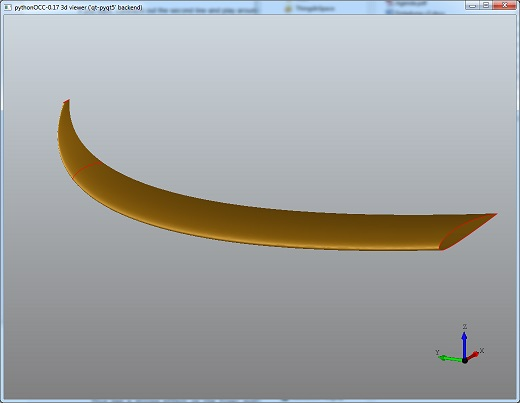